In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SkLearn
from sklearn.datasets import make_regression

%matplotlib inline

In [129]:
# Create dataset for Linear Regression
## n_informative = number of features out of the total number of features(n_features) that are useful
X, y = make_regression(n_samples = 200, n_features = 1, n_informative = 1, n_targets = 1, random_state = 42, noise = 10)

In [131]:
def plot_data(X, y):
#     Opacity of the image generated
    plt.scatter(X, y, alpha = 0.8)
    
    plt.title('Data')
    plt.xlabel('X Label')
    plt.ylabel('Y Label')

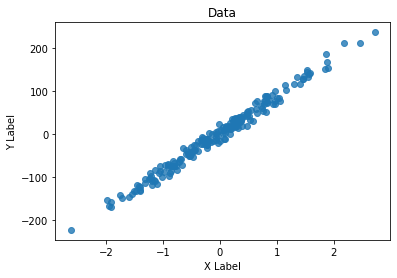

In [132]:
# Plot generated data
plot_data(X, y)

In [9]:
# Shape of data
print('Shape of X: ', X.shape)
print("Shape of Y: ", y.shape)

Shape of X:  (200, 1)
Shape of Y:  (200,)


As the shape of y is (200,), we will have to reshape it in order to avoid any errors during vector multiplication

In [15]:
y = y.reshape(y.shape[0], 1)
y.shape

(200, 1)

In [ ]:
# Split data into two parts - train data and test data
## For that we will first import sklearn's train_test_split
from sklearn.model_selection import train_test_split

Below code will divide the data into 80% for training and the rest 20% for testing our model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


In [23]:
def init_params():
    m = np.random.normal(scale= 10)
    b = np.random.normal(scale = 10)
    
    return m, b

In [24]:
m, b = init_params()

In [25]:
m

19.92049126369493

In [26]:
b

1.3689482558936794

In [27]:
# Plot graph with the random line generated
def plot_graph(X, y, m, b):
    
    # x_line generates 10 random points between min and max values of X
    x_line = np.linspace(np.min(X), np.max(X), 10) 
    
    # plot y_line using x_line and parameters 'm' and 'b'
    y_line = m * x_line + b
    
    # plot dataset points
    plt.scatter(X, y, alpha = 0.8)
    
    # plot the generated line
    plt.plot(x_line, y_line, linewidth = 2, markersize = 12, color = 'red', alpha = 0.8)
    
    plt.title('Generated line on the dataset')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.show()

Randomly Generated Line

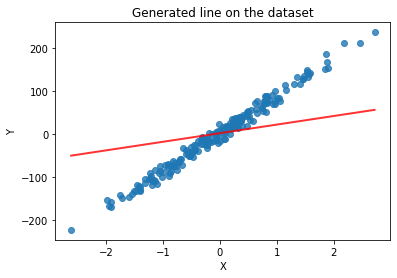

In [28]:
plot_graph(X, y, m, b)

# Forward propagation

In [45]:
def forward_prop(X_train, m, b):
    y_pred = m * X_train + b
    
    return y_pred

In [46]:
y_pred = forward_prop(X_train, m, b)

In [47]:
y_pred[0:5]

array([[  5.52961368],
       [-14.8823934 ],
       [ -0.06552874],
       [  2.7347564 ],
       [-18.04718944]])

In [48]:
y_pred.shape

(160, 1)

# Cost Function 

In [77]:
def compute_loss(y_train, y_pred):
    M = y_train.shape[0] # Number of examples in training set
    loss = (1 / (2 * M)) * np.sum((y_train - y_pred)**2)
    
    return loss
    

In [64]:
losses = []
loss = loss(y_train, y_pred)
losses.append(loss)

In [66]:
loss

1990.6702410081052

# Gradient Descent for Linear Regression

For this section we will need to compute partial derivates of the loss function using parameters 'm' and 'b'. For details on computation of these gradients refer to Andrew Ng's Stanford machine learning notes.

In [79]:
def gradient(m, b, X_train, y_train, y_pred):
    M = X_train.shape[0]
    dm = (1 / M) * np.sum((y_pred - y_train) * X_train)
    db = (1 / M) * np.sum(y_pred - y_train)
    
    return dm, db

Update Parameters

In [80]:
def update_params(m, b, dm, db, learning_rate):
    
    m = m - learning_rate * dm
    b = b - learning_rate * db
    
    return m, b

Gradient Descent

In [81]:
def gradient_descent(X_train, y_train, y_pred, learning_rate, m, b):
    
    # Compute gradient
    dm, db = gradient(m, b, X_train, y_train, y_pred)
    
    # Update parameters
    m, b = update_params(m, b, dm, db, learning_rate)
    
    return m, b

In [121]:
losses = []

def train(X_train, y_train, learning_rate = 0.01, epochs = 251):
    m, b = init_params()   
        
    for i in range(epochs):
        y_pred = forward_prop(X_train, m, b)
                
        loss = compute_loss(y_train, y_pred)
        losses.append(loss)
        
        m, b = gradient_descent(X_train, y_train, y_pred, learning_rate, m, b)
        
        if (i%10 == 0):
            print('Epoch: ', i)
            print('Loss: ', loss)

In [122]:
train(X_train, y_train, learning_rate = 0.01, epochs = 251)

Epoch:  0
Loss:  2649.9002402359665
Epoch:  10
Loss:  2244.128886342895
Epoch:  20
Loss:  1901.9159057785
Epoch:  30
Loss:  1613.2704760657698
Epoch:  40
Loss:  1369.7787259787708
Epoch:  50
Loss:  1164.353643804841
Epoch:  60
Loss:  991.0248641982926
Epoch:  70
Loss:  844.7619355689724
Epoch:  80
Loss:  721.3257035098528
Epoch:  90
Loss:  617.1433110973785
Epoch:  100
Loss:  529.2030416049029
Epoch:  110
Loss:  454.96583629086854
Epoch:  120
Loss:  392.2908286901263
Epoch:  130
Loss:  339.37266330759144
Epoch:  140
Loss:  294.6887242027243
Epoch:  150
Loss:  256.95469887077735
Epoch:  160
Loss:  225.08715444274955
Epoch:  170
Loss:  198.1720143761281
Epoch:  180
Loss:  175.43800104715433
Epoch:  190
Loss:  156.23425846691012
Epoch:  200
Loss:  140.01149431863925
Epoch:  210
Loss:  126.30608549605596
Epoch:  220
Loss:  114.72667953123535
Epoch:  230
Loss:  104.94289843320192
Epoch:  240
Loss:  96.67581377484035
Epoch:  250
Loss:  89.68991426116041


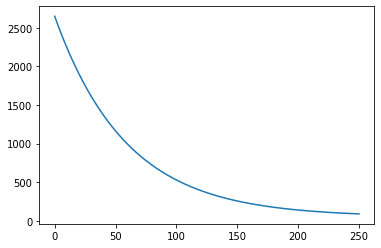

In [123]:
plt.plot(np.arange(251), losses)
losses.clear()